# Test data reading with plot_vtk_matplotlib

In [1]:
%matplotlib inline
import dolfin as df
import mshr
import vtk
import numpy as np
import plot_vtk_matplotlib as pvm
from vtk.util.numpy_support import vtk_to_numpy
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

In [3]:
import os
files = os.listdir("VTK_K_bin")
for f in files:
    print(f)

.ipynb_checkpoints
cavity_0.vtk
cavity_100.vtk
cavity_150.vtk
cavity_200.vtk
cavity_250.vtk
cavity_300.vtk
cavity_350.vtk
cavity_400.vtk
cavity_450.vtk
cavity_50.vtk
cavity_500.vtk
fixedWalls
frontAndBack
movingWall


In [4]:
def getData_pvm(filename):
    vf_plot = pvm.plot_vtk_matplotlib(filename,z_max=1, z_min=-1, vtkfiletype="UnstructuredGrid"  )
    # Extract the data from the file
    vf_plot.extract_data()
    print "PVM:"
    print vf_plot.reader.GetOutput().GetPoints()
    nodes_vtk = vf_plot.reader.GetOutput().GetPoints().GetData()
    data_arrays = vf_plot.reader.GetOutput().GetPointData()
    pressure_vtk_array = data_arrays.GetArray(0) 
    speed_vtk_array = data_arrays.GetArray(1)
    nodes = vtk_to_numpy(nodes_vtk)
    p = vtk_to_numpy(pressure_vtk_array)
    U  = vtk_to_numpy(speed_vtk_array)
    return nodes, p, U

In [5]:
def getData_vtk(filename):
    # load a vtk file as input
    reader = vtk.vtkUnstructuredGridReader()
    reader.SetFileName(filename)
    reader.Update()
    print "VTK:"
    print reader.GetOutput().GetPoints()
    # Get the coordinates of nodes in the mesh
    nodes_vtk_array= reader.GetOutput().GetPoints().GetData()  
    pressure_vtk_array = reader.GetOutput().GetPointData().GetArray(0)
    speed_vtk_array = reader.GetOutput().GetPointData().GetArray(1)
    nodes = vtk_to_numpy(nodes_vtk_array)
    p = vtk_to_numpy(pressure_vtk_array)
    U  = vtk_to_numpy(speed_vtk_array)
    return nodes, p, U

In [6]:
def plot3D(nodes, a, vmin, vmax):
    cmap = mpl.cm.seismic
    color_map = plt.cm.get_cmap('plasma')
    fig = plt.figure(figsize=(14,10))
    ax = fig.add_subplot(111, projection='3d')
    #for i in range(0,len(nodes),2):
    splt = ax.scatter(nodes[:,0],nodes[:,1],nodes[:,2],s=60,
                   c = a,
                   cmap = color_map,
                   vmin = vmin,
                   vmax = vmax,
                   marker='o')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    fig.colorbar(splt, shrink=0.5)
    plt.show()

In [7]:
def extractFlatData(nodes, p, U):
    merged = np.empty([len(nodes),6])
    merged[:,0] = p
    merged[:,1:3] = U[:,:2]
    merged[:,3:] = nodes
    # Merged z0 and z1 arrays should be same because of 
    # the model symmetry along z-axis
    merged_z0 = merged[np.where(merged[:,5] == 0)]
    merged_z1 = merged[np.where(merged[:,5] != 0)]
    # Extract nodes, p and U arrays from z0 array
    p = merged_z0[:,0]
    U = merged_z0[:,1:3]
    nodes = merged_z0[:,3:5]
    return nodes, p, U

def plot2D(nodes, a, vmin, vmax):     
    # 2d plotting
    fig = plt.figure(figsize=(8,6))
    cmap = mpl.cm.seismic
    color_map = plt.cm.get_cmap('plasma')
    axes = plt.gca()
    #axes.set_xlim([-.1,2.1])
    #axes.set_ylim([-.01,0.11])
    #plt.axis('off')
    sc = plt.scatter(nodes[:,0],nodes[:,1],
                     s=320,
#                     color=cmap(a / a_max),
                     c = a,
                     cmap = color_map,
                     vmin = vmin,
                     vmax = vmax,
                     linewidth=0, 
                     marker="s")
    plt.colorbar(sc)
    fig.tight_layout()

PVM:
vtkPoints (0x6cde660)
  Debug: Off
  Modified Time: 1674
  Reference Count: 2
  Registered Events: (none)
  Data: 0x6e401c0
  Data Array Name: Points
  Number Of Points: 882
  Bounds: 
    Xmin,Xmax: (-1.01414e+27, 7.71994e+35)
    Ymin,Ymax: (-1.01414e+27, 7.71994e+35)
    Zmin,Zmax: (0, 2.0717e-32)




/usr/local/lib/python2.7/dist-packages/matplotlib/cbook.py:1872: RuntimeWarning: invalid value encountered in isfinite
  mask = np.isfinite(xd)


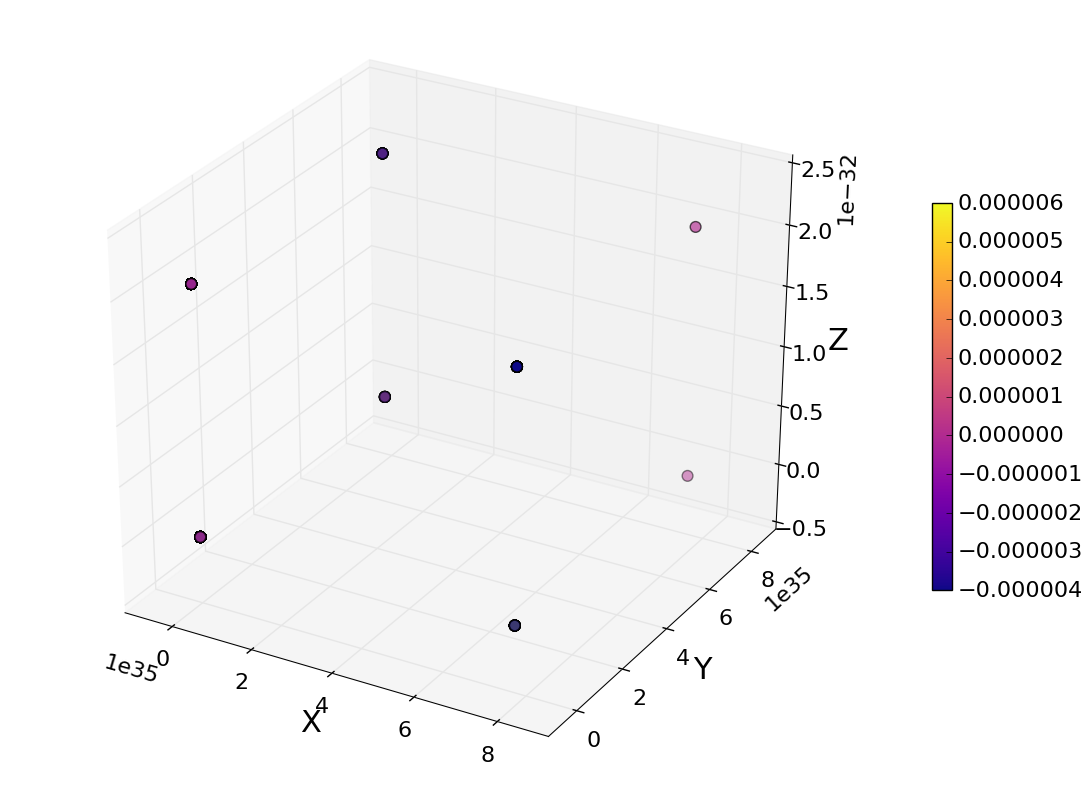

VTK:
vtkPoints (0x6477e80)
  Debug: Off
  Modified Time: 1888
  Reference Count: 2
  Registered Events: (none)
  Data: 0x7095110
  Data Array Name: Points
  Number Of Points: 882
  Bounds: 
    Xmin,Xmax: (-1.01414e+27, 7.71994e+35)
    Ymin,Ymax: (-1.01414e+27, 7.71994e+35)
    Zmin,Zmax: (0, 2.0717e-32)


p: nan - nan
nodes: -1.01414214793e+27 - 7.71993907252e+35 . -1.01414214793e+27 - 7.71993907252e+35 . 0.0 - 2.0717000601e-32
[[  0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  2.07651474e-32   0.00000000e+00   0.00000000e+00]
 [  2.07170006e-32   0.00000000e+00   0.00000000e+00]
 ..., 
 [ -1.01414215e+27  -4.29492128e+08   2.07170006e-32]
 [  3.23715911e+17  -4.29492128e+08   2.07170006e-32]
 [ -4.29492128e+08  -4.29492128e+08   2.07170006e-32]]
(nan, nan)
Comparison:
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 ..., 
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]


In [13]:
filename="VTK_K_bin/cavity_50.vtk"

nodes, p, U = getData_pvm(filename)
vmin = -4e-06
vmax = 6e-06
plot3D(nodes,p, vmin, vmax)
nodes_v, p_v, U_v = getData_vtk(filename)
print "p: {} - {}".format(np.amin(p),np.amax(p))
print "nodes: {} - {} . {} - {} . {} - {}".format(np.amin(nodes[:,0]),
                                                  np.amax(nodes[:,0]),
                                                  np.amin(nodes[:,1]),
                                                  np.amax(nodes[:,1]),
                                                  np.amin(nodes[:,2]),
                                                  np.amax(nodes[:,2]))
print nodes
print(np.amin(p_v),np.amax(p_v))
print("Comparison:")
print U - U_v


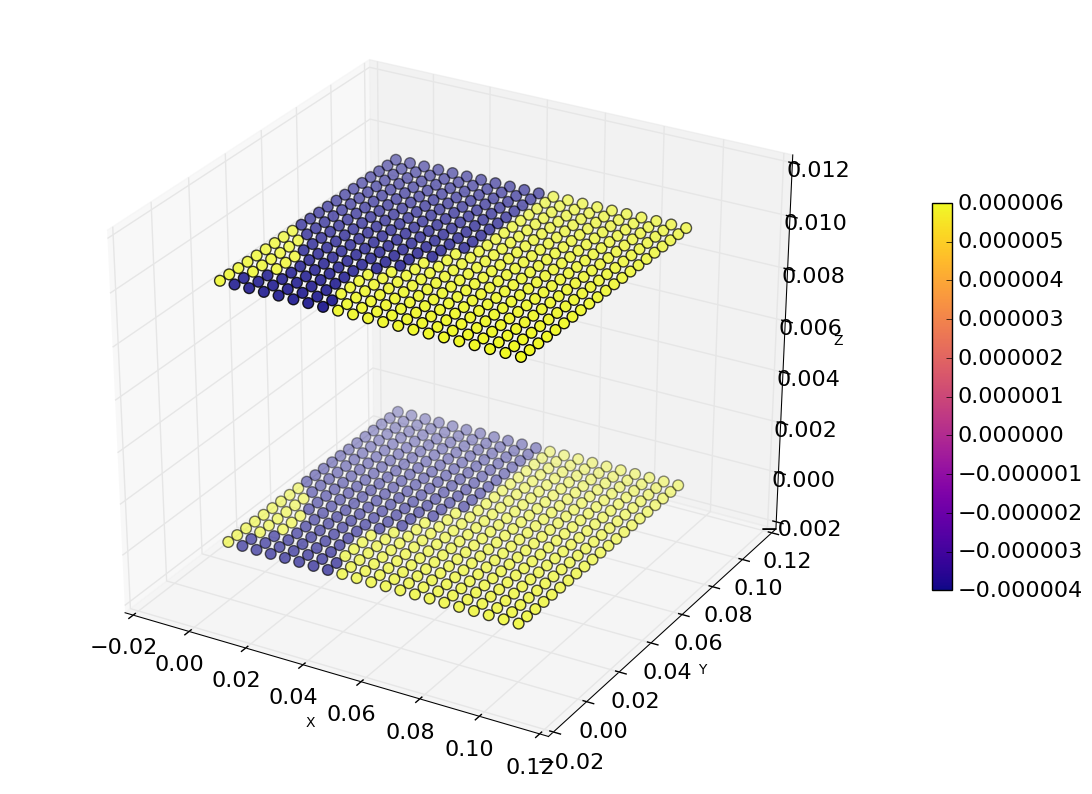

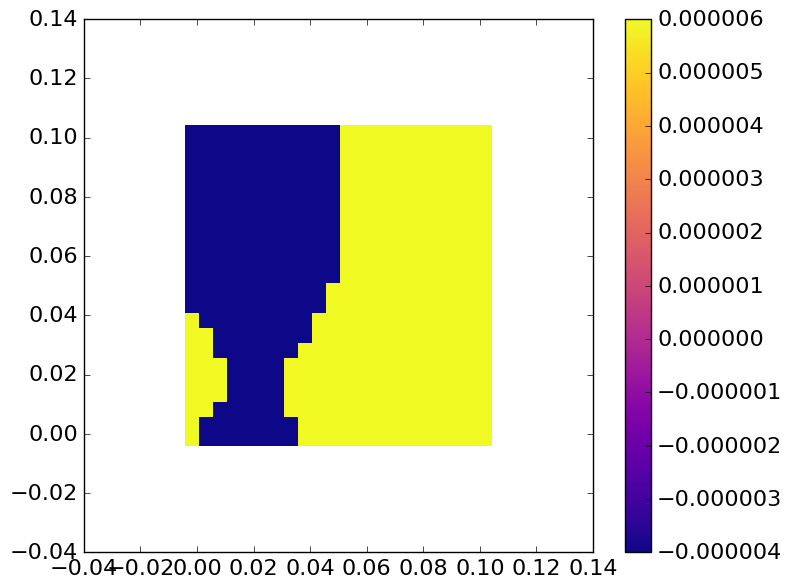

In [45]:
vmin = -4e-06
vmax = 6e-06
plot3D(nodes,p, vmin, vmax)
nodes_half, p_half, U_half = extractFlatData(nodes, p, U)
plot2D(nodes_half,p_half, vmin, vmax)

In [38]:
def plotVector(X, Y, UN, VN, U, vmin, vmax):
    plot1 = plt.figure(figsize=(14,10))
    plt.quiver(X, Y, UN, VN,        # data
               U,                   # colour the arrows based on this array
               cmap=plt.cm.seismic,     # colour map
               norm=mpl.colors.Normalize(vmin=vmin,vmax=vmax), # Colour range fix
               headlength=4,
               width=0.007,
               linewidths=1,
               edgecolors="k"
               )

    plt.colorbar()                  # adds the colour bar
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Velocity vector')
    plt.show(plot1)                 # display the plot

PVM:
vtkPoints (0x6bb8f20)
  Debug: Off
  Modified Time: 6499
  Reference Count: 2
  Registered Events: (none)
  Data: 0x72b58e0
  Data Array Name: Points
  Number Of Points: 882
  Bounds: 
    Xmin,Xmax: (0, 0.1)
    Ymin,Ymax: (0, 0.1)
    Zmin,Zmax: (0, 0.01)


(0.0, 1.0)


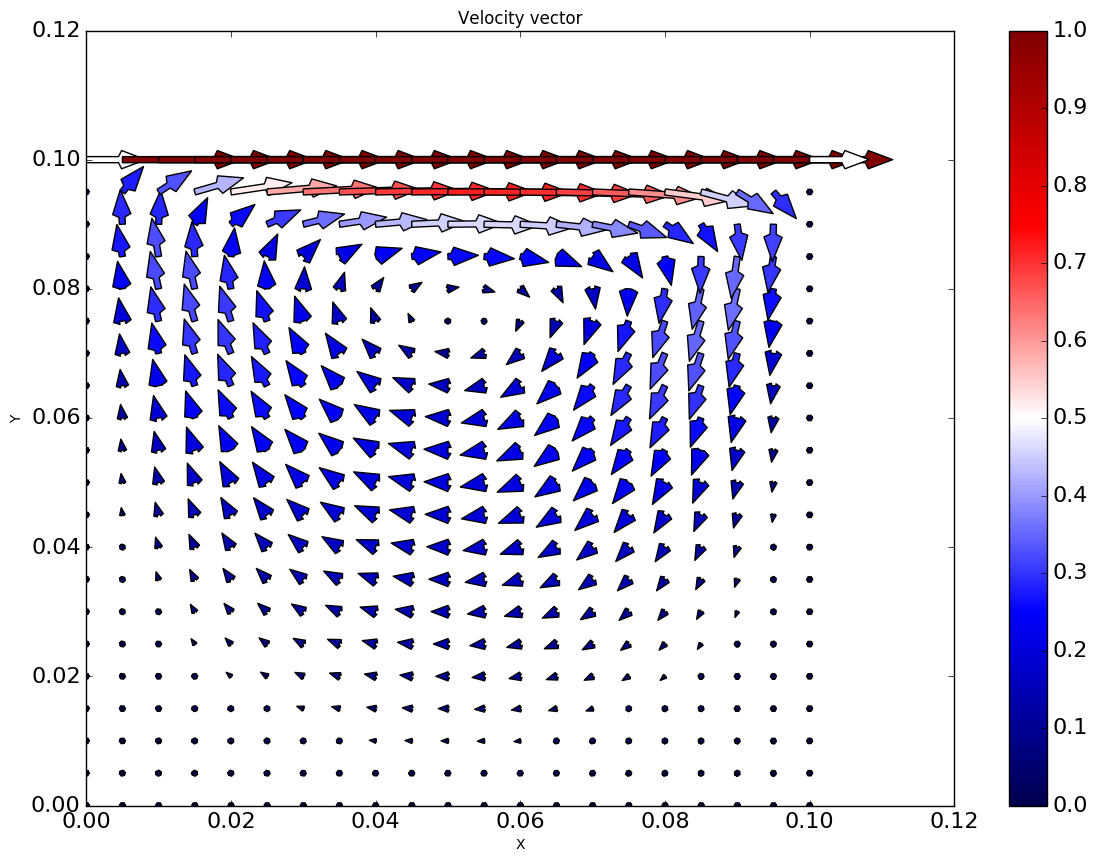

In [46]:
# filename = "ppWall_120.vtk"
nodes, p , U   = getData_pvm(filename)

nodes_half, p_half, U_half = extractFlatData(nodes, p, U)
Un_half = np.sqrt(U_half[:,0]**2 + U_half[:,1]**2)

print(np.amin(Un_half),np.amax(Un_half))
#print(np.amin(p_),np.amax(p_))
vmin = 0
vmax = 1

plotVector(nodes_half[:,0], nodes_half[:,1], U_half[:,0], U_half[:,1], Un_half, vmin, vmax)